In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import asyncio
import json
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
import gensim
from playwright.async_api import async_playwright
plt.style.use('ggplot')
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator
import re
from selenium import webdriver
from langdetect import detect, DetectorFactory
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
sia = SentimentIntensityAnalyzer()

In [2]:
import pandas as pd
import os
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads/d-science')
os.chdir(downloads_path)
bootcamps = pd.read_csv('bootcamps.csv', index_col=0)
bootcamps = bootcamps.apply(pd.to_numeric, errors="coerce").astype("Int64")
bootcamps = bootcamps.fillna(0)

Coursereport original

In [44]:
# Coursereport original
# import asyncio
# import json
# from playwright.async_api import async_playwright
# coursereport = {'Ironhack': 'https://www.coursereport.com/schools/ironhack', 
#                 'le wagon':'https://www.coursereport.com/schools/le-wagon', 
#                 'Careerfoundry':'https://www.coursereport.com/schools/careerfoundry',
#                 'Code institute':'https://www.coursereport.com/schools/code-institute',
#                 'Masterschool':'https://www.coursereport.com/schools/masterschool',
#                 'WBS coding school': 'https://www.coursereport.com/schools/wbs-coding-school',
#                 'Codeworks':'https://www.coursereport.com/schools/codeworks',
#                 'Digital career institute': 'https://www.coursereport.com/schools/digital-career-institute',
#                 'neuefische':'https://www.coursereport.com/schools/neue-fische',
#                 'Spiced academy': 'https://www.coursereport.com/schools/spiced-academy'}

# async def get_reviews_for_provider(page, provider_name, provider_url):
#     reviews = []
#     await page.goto(provider_url, wait_until="networkidle")

#     page_num = 1
#     while True:
#         print(f"📄 Scraping page {page_num} of {provider_name}...")

#         await page.wait_for_selector("ul.divide-y.divide-gray.divide-solid", timeout=10000)
#         review_blocks = page.locator("ul.divide-y.divide-gray.divide-solid > li.py-6.space-y-4")
#         count = await review_blocks.count()

#         for i in range(count):
#             review = review_blocks.nth(i)
#             try:
#                 # 🚨 Check and close modal BEFORE clicking anything
#                 modal_close_btn = page.locator("turbo-frame#get_matched_modal button, turbo-frame#get_matched_modal [data-action*='close']")
#                 if await modal_close_btn.count() > 0:
#                     print("🧼 Dismissing modal before review...")
#                     try:
#                         await modal_close_btn.first.click()
#                         await asyncio.sleep(1)
#                     except Exception as e:
#                         print(f"⚠️ Could not dismiss modal before review: {e}")

#                 # Expand full review text if needed
#                 read_more_button = review.locator("button:text('Read More')")
#                 if await read_more_button.count() > 0:
#                     await read_more_button.first.click()
#                     await asyncio.sleep(0.3)

#                 content_blocks = review.locator("div.text-gray-dark.break-words > div[data-toggle-target='content']")
#                 count_contents = await content_blocks.count()
#                 text = ""

#                 if count_contents > 1:
#                     text = await content_blocks.nth(1).inner_text()
#                     if not text.strip():
#                         text = await content_blocks.first.inner_text()
#                 elif count_contents == 1:
#                     text = await content_blocks.first.inner_text()
#                 else:
#                     text_el = review.locator("div.text-gray-dark.break-words")
#                     text = await text_el.inner_text()

#                 if not text.strip():
#                     continue

#                 date_el = review.locator("div.flex.text-sm.leading-relaxed.justify-between.gap-2 >> div.text-gray-medium.flex-shrink-0")
#                 date = await date_el.inner_text()

#                 bootcamp_info_el = review.locator("div.flex-grow > div.flex.text-gray-medium.space-x-4 > span")
#                 bootcamp_info = ""
#                 if await bootcamp_info_el.count() > 0:
#                     bootcamp_info = await bootcamp_info_el.inner_text()

#                 reviews.append({
#                     "provider": provider_name,
#                     "date": date.strip(),
#                     "review": text.strip(),
#                     "bootcamp_info": bootcamp_info.strip(),
#                     "source": 'coursereport'
#                 })

#             except Exception as e:
#                 print(f"❌ Error extracting review #{i} for {provider_name}: {e}")
#                 continue


#         # Pagination
#         next_button = page.locator("#reviews span.page.next a[rel='next']")
#         if await next_button.count() > 0:
#             await next_button.first.click()
#             await page.wait_for_selector("ul.divide-y.divide-gray.divide-solid", timeout=10000)
#             page_num += 1
#             await asyncio.sleep(1)
#         else:
#             print(f"✅ Finished {provider_name}")
#             break

#     return reviews

# async def get_all_reviews():
#     all_reviews = []
#     async with async_playwright() as p:
#         browser = await p.chromium.launch(headless=True)
#         context = await browser.new_context()
#         page = await context.new_page()

#         for provider, url in coursereport.items():
#             try:
#                 provider_reviews = await get_reviews_for_provider(page, provider, url)
#                 all_reviews.extend(provider_reviews)
#             except Exception as e:
#                 print(f"⚠️ Failed to scrape {provider}: {e}")

#         await browser.close()
#     return all_reviews

# async def main():
#     data = await get_all_reviews()
#     with open("coursereport_all.json", "w", encoding="utf-8") as f:
#         json.dump(data, f, ensure_ascii=False, indent=2)
#     print(f"💾 Saved {len(data)} reviews to coursereport_all.json")

# # Run the script
# await main()

df_coursereport = pd.read_json('coursereport_reviews.json')
df_coursereport.provider.value_counts()

provider
le wagon                    3651
Careerfoundry               1529
Ironhack                    1075
WBS coding school            347
Codeworks                    192
Code institute               152
Spiced academy               109
Digital career institute      33
neuefische                    22
Masterschool                  15
Name: count, dtype: int64

Trustpilot original

In [71]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

trustpilot = {# 'Ironhack': 'https://www.trustpilot.com/review/ironhack.com?languages=all', 
                # 'le wagon':'https://www.trustpilot.com/review/lewagon.com?languages=all', 
                # 'Stackfuel': 'https://de.trustpilot.com/review/stackfuel.com?languages=all',
                'Careerfoundry':'https://www.trustpilot.com/review/careerfoundry.com?languages=all',
                # 'Code institute':'https://de.trustpilot.com/review/codeinstitute.net?languages=all',
                # 'Masterschool':'https://de.trustpilot.com/review/masterschool.com?languages=all',
                # 'WBS coding school': 'https://de.trustpilot.com/review/www.wbscodingschool.com?languages=all',
                # 'Digital career institute': 'https://www.trustpilot.com/review/digitalcareerinstitute.org?languages=all',
                # 'neuefische':'https://de.trustpilot.com/review/neuefische.de?languages=all',
                'Spiced academy': 'https://www.trustpilot.com/review/spiced-academy.com'}

# Set up headless Chrome
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

from selenium.webdriver.common.by import By

def extract_reviews_from_page(provider_name):
    reviews = []
    review_cards = driver.find_elements(By.CSS_SELECTOR, 'article[data-service-review-card-paper]')
    print(f"🔍 Found {len(review_cards)} review cards")

    for i, card in enumerate(review_cards):
        try:
            # REVIEW TEXT
            try:
                review_el = card.find_element(By.CSS_SELECTOR, 'p[data-service-review-text-typography]')
                review_text = review_el.text.strip()
            except:
                review_text = ''
            
            # DATE
            try:
                date_el = card.find_element(By.CSS_SELECTOR, 'p[data-service-review-date-of-experience-typography] span')
                date_text = date_el.text.strip()
            except:
                date_text = ''

            # LANG (get from review paragraph itself)
            try:
                lang = review_el.get_attribute('lang') or 'unknown'
            except:
                lang = 'unknown'

            if not review_text or not date_text:
                print(f"⚠️ Skipping card #{i}: Missing review or date.")
                continue

            reviews.append({
                'provider': provider_name,
                'review': review_text,
                'date': date_text,
                'lang': lang,
                'source': 'trustpilot'
            })

        except Exception as e:
            print(f"❌ Error in card #{i}: {e}")

    return reviews


from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def scrape_reviews_for_provider(provider_name, url):
    all_reviews = []
    page = 1

    while True:
        paged_url = f"{url}&page={page}" if "?" in url else f"{url}?page={page}"
        print(f"{provider_name} Loading {paged_url}")
        driver.get(paged_url)

        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, 'article[data-service-review-card-paper="true"]'))
            )
        except Exception as e:
            print("Timeout waiting for reviews to load:", e)
            break

        reviews = extract_reviews_from_page(provider_name)
        print(f"📥 Page {page}: Found {len(reviews)} reviews.")

        all_reviews.extend(reviews)

        try:
            next_button = driver.find_element(By.CSS_SELECTOR, 'a[data-pagination-button-next-link="true"]')
            if not next_button.is_displayed() or 'disabled' in next_button.get_attribute('class').lower() or next_button.get_attribute('aria-disabled') == 'true':
                print("Next page button is disabled or not clickable.")
                break
        except NoSuchElementException:
            print("No next page button found.")
            break

        page += 1

    return all_reviews


all_reviews = []

for provider, url in trustpilot.items():
    reviews = scrape_reviews_for_provider(provider, url)
    all_reviews.extend(reviews)

driver.quit()

with open('trustpilot_reviews1.json', 'w', encoding='utf-8') as f:
    json.dump(all_reviews, f, ensure_ascii=False, indent=4)

print(f"\n Saved {len(all_reviews)} reviews to trustpilot1_reviews.json")

Careerfoundry Loading https://www.trustpilot.com/review/careerfoundry.com?languages=all&page=1
🔍 Found 24 review cards
⚠️ Skipping card #0: Missing review or date.
⚠️ Skipping card #1: Missing review or date.
⚠️ Skipping card #2: Missing review or date.
⚠️ Skipping card #3: Missing review or date.
📥 Page 1: Found 20 reviews.
Careerfoundry Loading https://www.trustpilot.com/review/careerfoundry.com?languages=all&page=2
🔍 Found 24 review cards
⚠️ Skipping card #0: Missing review or date.
⚠️ Skipping card #1: Missing review or date.
⚠️ Skipping card #2: Missing review or date.
⚠️ Skipping card #3: Missing review or date.
📥 Page 2: Found 20 reviews.
Careerfoundry Loading https://www.trustpilot.com/review/careerfoundry.com?languages=all&page=3
🔍 Found 24 review cards
⚠️ Skipping card #0: Missing review or date.
⚠️ Skipping card #1: Missing review or date.
⚠️ Skipping card #2: Missing review or date.
⚠️ Skipping card #3: Missing review or date.
📥 Page 3: Found 20 reviews.
Careerfoundry Loadi

In [73]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

trustpilot = {'Ironhack': 'https://www.trustpilot.com/review/ironhack.com?languages=all', 
                'le wagon':'https://www.trustpilot.com/review/lewagon.com?languages=all', 
                'Stackfuel': 'https://de.trustpilot.com/review/stackfuel.com?languages=all',
                'Careerfoundry':'https://www.trustpilot.com/review/careerfoundry.com?languages=all',
                'Code institute':'https://de.trustpilot.com/review/codeinstitute.net?languages=all',
                'Masterschool':'https://de.trustpilot.com/review/masterschool.com?languages=all',
                'WBS coding school': 'https://de.trustpilot.com/review/www.wbscodingschool.com?languages=all',
                'Digital career institute': 'https://www.trustpilot.com/review/digitalcareerinstitute.org?languages=all',
                'neuefische':'https://de.trustpilot.com/review/neuefische.de?languages=all',
                'Spiced academy': 'https://www.trustpilot.com/review/spiced-academy.com'}

# Set up headless Chrome
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

def extract_reviews_from_page(provider_name):
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    reviews = []

    # Loop through each full review card (article)
    review_cards = soup.find_all('article', attrs={'data-service-review-card-paper': True})

    for card in review_cards:
        # Review section inside the card
        section = card.find('section', class_='styles_reviewContentwrapper__K2aRu')

        # Review text
        review_tag = section.find('p', attrs={'data-service-review-text-typography': True}) if section else None
        review_text = review_tag.get_text(separator="\n").strip() if review_tag else 'No review text'

        # Date
        date_p = section.find('p', attrs={'data-service-review-date-of-experience-typography': True}) if section else None
        date_span = date_p.find('span') if date_p else None
        date_text = date_span.text.strip() if date_span else 'No date'

        # Country code
        country_span = card.find('span', attrs={'data-consumer-country-typography': True})
        country_code = country_span.get_text(strip=True) if country_span else 'unknown'

        if review_text != 'No review text' and date_text != 'No date':
            reviews.append({
                'country_code': country_code,
                'review': review_text,
                'date': date_text,
                'provider': provider_name,
                'source': 'trustpilot'
                })
        # else:
        #    continue
            
    return reviews

def scrape_reviews_for_provider(provider_name, url):
    all_reviews = []
    # base_url = 'https://de.trustpilot.com/review/lewagon.com'
    page = 1

    while True:
        paged_url = f"{url}&page={page}" if "?" in url else f"{url}?page={page}" # f"{url}?page={page}" if page > 1 else url
        print(f"{provider_name} Loading {url}")
        driver.get(paged_url)
        time.sleep(3)  # Wait for JS to load

        reviews = extract_reviews_from_page(provider_name)
        print(f"📥 Page {page}: Found {len(reviews)} reviews.")

        all_reviews.extend(reviews)

        try:
            next_button = driver.find_element("css selector", 'a[data-pagination-button-next-link="true"]')
            # If found and visible, go to the next page
            # if 'disabled' in next_button.get_attribute('class'):
            if not next_button.is_displayed():
                print("Next page button is disabled.")
                break
        except NoSuchElementException:
            print("No next page button found.")
            break

        page += 1
        # Optional limit for testing
        # if page == 10:
        #     break

    return all_reviews

all_reviews = []

for provider, url in trustpilot.items():
    reviews = scrape_reviews_for_provider(provider, url)
    all_reviews.extend(reviews)

driver.quit()

with open('trustpilot_reviews.json', 'w', encoding='utf-8') as f:
    json.dump(all_reviews, f, ensure_ascii=False, indent=4)

print(f"\n Saved {len(all_reviews)} reviews to trustpilot_reviews.json")

# df_trustpilot = pd.read_json('trustpilot_reviews.json')
# df_trustpilot = df_trustpilot[
#     (df_trustpilot.review != 'No review text') &
#     (df_trustpilot.review.notna()) &
#     (df_trustpilot.review.str.strip() != '') &
#     (df_trustpilot.country_code.isin(['DE']))]

Ironhack Loading https://www.trustpilot.com/review/ironhack.com?languages=all
📥 Page 1: Found 20 reviews.
Ironhack Loading https://www.trustpilot.com/review/ironhack.com?languages=all
📥 Page 2: Found 20 reviews.
Ironhack Loading https://www.trustpilot.com/review/ironhack.com?languages=all
📥 Page 3: Found 7 reviews.
Ironhack Loading https://www.trustpilot.com/review/ironhack.com?languages=all
📥 Page 4: Found 0 reviews.
No next page button found.
le wagon Loading https://www.trustpilot.com/review/lewagon.com?languages=all
📥 Page 1: Found 19 reviews.
le wagon Loading https://www.trustpilot.com/review/lewagon.com?languages=all
📥 Page 2: Found 19 reviews.
le wagon Loading https://www.trustpilot.com/review/lewagon.com?languages=all
📥 Page 3: Found 20 reviews.
le wagon Loading https://www.trustpilot.com/review/lewagon.com?languages=all
📥 Page 4: Found 18 reviews.
le wagon Loading https://www.trustpilot.com/review/lewagon.com?languages=all
📥 Page 5: Found 20 reviews.
le wagon Loading https://w

In [33]:
df_trustpilot_de = df_trustpilot[df_trustpilot.country_code.isin(['DE'])]

In [ ]:
hey = hey = df_trustpilot[~df_trustpilot.country_code.isin(['DE', 'US', 'CA'])]
def filter_reviews_by_keywords(df, column='review', keywords=None):
    if keywords is None:
        keywords = ['remote']
    pattern = '|'.join(keywords)
    return df[df[column].str.contains(pattern, case=False, na=False)]
filtered_df = filter_reviews_by_keywords(hey)
filtered_df.to_csv('filter.csv')


In [21]:
df_trustpilot.to_csv('df_trustpilot.csv')

In [ ]:
# df_google = pd.read_csv('lewagon_google.csv', names=['date', 'review', 'source'])
# df_coursereport_raw = pd.read_json('lewagon_coursereport.json')
def filter_bootcamp_info(df):
    keywords = ['online', 'Berlin', 'Germany']
    mask = df['bootcamp_info'].str.contains('|'.join(keywords), case=False, na=False)
    return df[mask]
# df_coursereport = filter_bootcamp_info(df_coursereport_raw)
# df_lewagon = pd.concat([df_coursereport, df_google, df_trustpilot], ignore_index=True)
# df_lewagon

In [20]:
vc = df_trustpilot['country_code'].value_counts()
rare_providers = vc[vc < 10].index
df_filtered = df_trustpilot[df_trustpilot['country_code'].isin(rare_providers)]
df_filtered

,country_code,review,date,provider,source
12,BD,A student of Remote Part time May-2024 batch. ...,"May 21, 2024",Ironhack,trustpilot
95,AU,Great program of formation,06. Dezember 2024,le wagon,trustpilot
204,VN,"Très bonne expérience avec Le Wagon, des coach...",04. Juli 2024,le wagon,trustpilot
327,AR,Acabo de finalizar el Skill Course de Web Desi...,25. Januar 2024,le wagon,trustpilot
334,AR,Un bootcamp con gran calidad de contenido y bu...,29. Januar 2024,le wagon,trustpilot
...,...,...,...,...,...
7332,MX,The WBS Coding School Data Science course was ...,"April 17, 2025",WBS coding school,trustpilot
7335,MT,Disappointed by Misleading Advertising and Lac...,"April 11, 2025",WBS coding school,trustpilot
7349,AL,I took part in the Full time- Data science boo...,"October 11, 2024",WBS coding school,trustpilot
7377,LU,Ich habe am Data Science Bootcamp von Neue Fis...,01. Juni 2025,neuefische,trustpilot


In [20]:
def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
df_lewagon['review'].apply(clean_text)    

0     I can't imagine a better experience via a onli...
1     It was a great professional learning experienc...
2     Theoretical and practical introduction to the ...
3     This flexible bootcamp is really well-designed...
4     I've subscribed to 6 month online courses of w...
                            ...                        
81    Le Wagon est une très bonne formation, très in...
82    I recently completed the Le Wagon Data Science...
83    I recently completed Le Wagon's data science b...
84    Challenging, innovative, quick-paced and never...
85    Having been a little hesitant to choose the re...
Name: review, Length: 86, dtype: object

In [21]:
DetectorFactory.seed = 0
df_lewagon['language'] = df_lewagon['review'].apply(lambda x: detect(x))
translator = GoogleTranslator(source='auto', target='en') 
def safe_translate(text):
    try:
        return translator.translate(text)
    except Exception as e:
        print(f"Translation failed for text: {text[:30]}... — Error: {e}")
        return None
df_lewagon['translated'] = df_lewagon.apply(lambda row: safe_translate(row['review']) if row['language'] != 'en' else None, axis=1)

In [22]:
sia.polarity_scores("I am so happy") # {'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
sia.polarity_scores('I am very sad')['compound'] # {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}
# Compound goes from -1 to 1
# df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_lewagon['compound'] = df_lewagon.apply(lambda row: sia.polarity_scores(row['translated'] if pd.notnull(row['translated']) else row['review'])['compound'],axis=1)

In [23]:
import locale
locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')
mask = (df_lewagon['country_code'] == 'DE') | (df_lewagon['source'] == 'google')
df_lewagon.loc[mask, 'date'] = pd.to_datetime(
    df_lewagon.loc[mask, 'date'],
    format='%d. %B %Y',
    errors='coerce')  # Optional: prevents crash on invalid dates
df_lewagon['date'] = pd.to_datetime(df_lewagon['date'], errors='coerce')

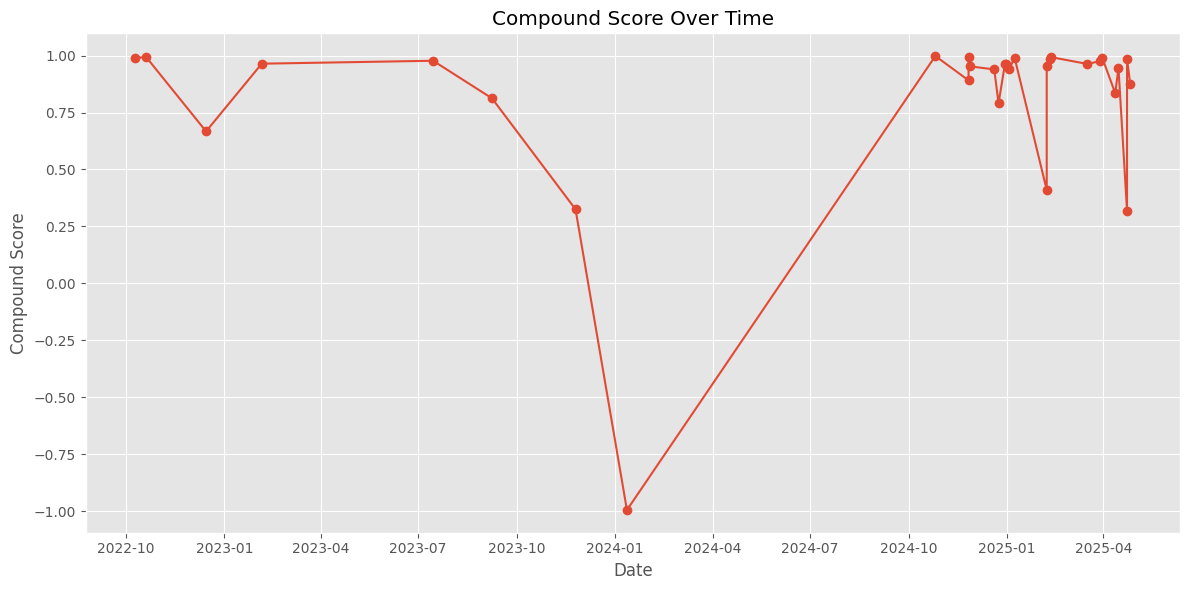

In [24]:
df = df_lewagon.sort_values('date').reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['compound'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Compound Score')
plt.title('Compound Score Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
print(df.review[df['compound'] == df['compound'].min()].to_list())

['LE WAGON: A HARROWING EXPERIENCE AND A TRUE NIGHTMARE\nMy journey with Le Wagon has been SO DISAPPOINTING that I feel the OBLIGATION to share my experience to prevent others from falling into the same trap. The SHOCKING news of the CANCELLATION of the bootcamp just five days before its scheduled start, due to only having two participants, marked the beginning of a series of OVERWHELMING problems.\nDuring the registration process, I found myself dealing with MORE THAN SIX INDIVIDUALS, and to make matters worse, I had to REPEAT the application process two or three times. The INEFFICIENCY of their communication system between the branches in Spain and Germany is UNACCEPTABLE and has added an extra layer of FRUSTRATION.\nIn my struggle to obtain the GOVERNMENT VOUCHER, I faced more obstacles. The agent expressed DOUBTS about the RELIABILITY of Le Wagon, which only HEIGHTENED MY CONCERNS. The POSITIVE REVIEWS on their website do not reveal the DARK REALITY of the issues Le Wagon is facing

In [26]:
# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

df_lewagon['cleaned'] = df.apply(lambda row: clean(row['translated']) if pd.notnull(row['translated']) else clean(row['review']), axis=1)
unwanted = {'le', 'wagon', 'bootcamp', 'lewagon', 'bootcamps', 'wagon’s'}
df_lewagon['cleaned'] = df_lewagon['cleaned'].apply(lambda x: " ".join([word for word in x.split() if word not in unwanted]))
df['tokens'] = df_lewagon['cleaned'].apply(lambda x: x.split())
# Creating document-term matrix 
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

Coherence Score: 0.4052


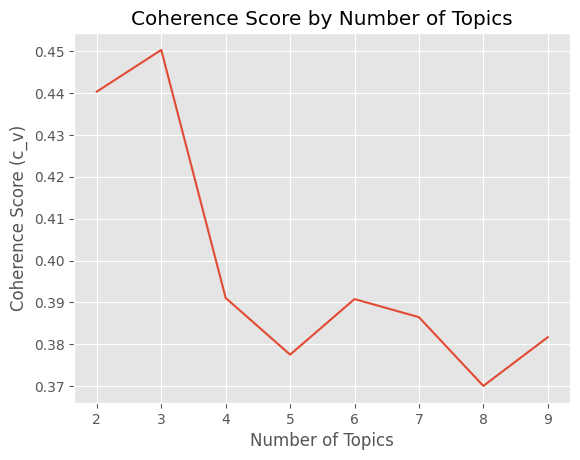


Top Words per Topic:

Topic 0:
  best: 0.015200000256299973

Topic 1:
  teacher: 0.01679999940097332
  great: 0.01640000008046627

Topic 2:
  data: 0.01769999973475933


In [27]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# === Train LDA Model ===
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# === Coherence Score for current model ===
coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f'Coherence Score: {coherence:.4f}')
# Higher coherence → The top words in a topic are more related to each other (e.g., "apple", "banana", "grape", "fruit").
# Lower coherence → The words seem unrelated (e.g., "government", "banana", "code", "policy").

# === Coherence over different topic counts ===
coherence_values = []
for k in range(2, 10):
    model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    cm = CoherenceModel(model=model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_values.append((k, cm.get_coherence()))

# Plot coherence vs number of topics
k_values, scores = zip(*coherence_values)
plt.plot(k_values, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score by Number of Topics")
plt.show()

# === Print Top N Words per Topic (Clean Format) ===
topn = 5
threshold = 0.015

print("\nTop Words per Topic:")
topics = lda_model.show_topics(num_topics=3, num_words=topn, formatted=False)
for topic_id, terms in topics:
    print(f"\nTopic {topic_id}:")
    for word, weight in terms:
        if weight >= threshold:
            print(f"  {word}: {round(weight, 4)}")
# > 0.60	Very good — topics are highly coherent and interpretable.
# 0.50 – 0.60	Good — topics are generally coherent and useful.
# 0.40 – 0.50	Moderate — topics may be mixed or noisy. May need tuning.
# < 0.40	Low — topics are likely incoherent or too broad/noisy.

# === Visualization with pyLDAvis ===
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


In [28]:
competitors = ['Ironhack','Le Wagon','Stackfuel','Careerfoundry','Code institute', 'Masterschool','WBS coding school','Codeworks','Digital career institute']
courses = ['Web Development', 'Data Analytics', 'UX/UI Design', 'Digital Marketing', 'Data Science and ML', 'AI', 'DevOps & Cloud Computing', 'Cybersecurity']
features = pd.DataFrame(columns=competitors, index=courses)

In [31]:
import gensim
from gensim.utils import simple_preprocess
# from gensim.models import Phrases, Phraser
from gensim.models.phrases import Phraser, Phrases

from nltk.corpus import stopwords
import spacy
import nltk

# Normalization
# Download resources if needed
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

stop_words = set(stopwords.words('english'))

def preprocess_texts(texts):
    """
    texts: list of raw documents (strings)
    returns: list of tokenized, cleaned, lemmatized texts
    """
    # Tokenize and clean
    def tokenize(text):
        return [token for token in simple_preprocess(text, deacc=True) if token not in stop_words]

    tokenized_texts = [tokenize(doc) for doc in texts]

    # Build bigrams and trigrams
    bigram = Phrases(tokenized_texts, min_count=5, threshold=100)
    trigram = Phrases(bigram[tokenized_texts], threshold=100)
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    texts_bigrams = [bigram_mod[doc] for doc in tokenized_texts]
    texts_trigrams = [trigram_mod[bigram_mod[doc]] for doc in texts_bigrams]

    # Lemmatize
    def lemmatize(doc):
        doc = nlp(" ".join(doc))
        return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']]

    return [lemmatize(doc) for doc in texts_trigrams]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianarias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# ! jupyter nbconvert --to script competitor_analysis.ipynb


[NbConvertApp] Converting notebook competitor_analysis.ipynb to script
[NbConvertApp] Writing 20198 bytes to competitor_analysis.py
